In [1]:
import h5py
import os
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import matplotlib.patches as patches
sns.set_style('darkgrid')
import pickle
from matplotlib import gridspec
from matplotlib.lines import Line2D
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/trongnguyen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sns.set_context("poster", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":18}) 
import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [4]:
os.chdir('/Users/trongnguyen/Dropbox/FattyLiver/src/hydrogen/')

In [5]:
os.chdir('/Users/trongnguyen/Dropbox/FattyLiver/src/hydrogen/')
from helper_brl.outlierDetection import getBSC_Att, envDetection, filter_BSC_based_on_depth, findOutliers

In [6]:
from helper_brl import fattyLiver

In [7]:
from helper_brl.visualizeHelper import extract_segment_points

In [8]:
newdataBase = pd.read_excel('/Users/trongnguyen/Dropbox/FattyLiver/Rabbit_Liver_40.xlsx', sheet_name=0)
aliveOnly = newdataBase[newdataBase['Timely death'] == 1][['Rabbit', 'Weeks on diet', 'Lipid']]
dataBase = newdataBase[['Rabbit', 'Injection level', 'Weeks on diet','Lipid']]
dataBase = dataBase[dataBase['Injection level'] ==0]

threshold_lipid = 11
dataBase['High_fat'] = dataBase.Lipid > threshold_lipid
dataBase = dataBase.sort_values(['Lipid'])
dataBase.index = range(1, 16)

In [9]:
ATTs_dict, freq_att_dict, freq_bsc_dict, depth_dict, BSCs_dict = {}, {}, {}, {}, {} 
left_dict, right_dict, top_dict, bottom_dict = {}, {}, {}, {} # ROIs of each BSC
att_bottom, bad_BSC = {}, {}
name_tag = 'fix_bug_average_ref_phantom_6MHz_v7_10a_30b'

number = str(int(750))
print(number, end = ', ')
path = "/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L" + number + "/L94_left/BSC_ATT/"
ATTs_dict[number], freq_att_dict[number], BSCs_dict[number], freq_bsc_dict[number], \
depth_dict[number], left_dict[number], right_dict[number], \
top_dict[number], bottom_dict[number], att_bottom[number], bad_BSC[number] = getBSC_Att(path,name_tag)

750, 

# Loading RF data 

In [19]:
%qtconsole

In [10]:
sns.set_style('white')

In [11]:
rf_path = '/Volumes/TrongDrive/Liver_Study/RF_hdf5/'

In [12]:
hf = h5py.File(rf_path + number + '.h5', 'r')
gp = hf.get('L94/Left')
image = np.array(gp.get(str(2)))
hf.close()

In [13]:
fs = 40e6 * 1.0
speedOfSound = 1540.0
lateralDistance = 38
lineLength  = image.shape[0]
axialDistance = lineLength * speedOfSound/2 / fs * 1000
extent = [0, lateralDistance, 0, axialDistance]

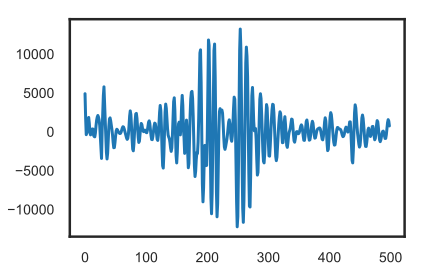

In [17]:
plt.plot(image[1:500, 100])

# Load reference phantom

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


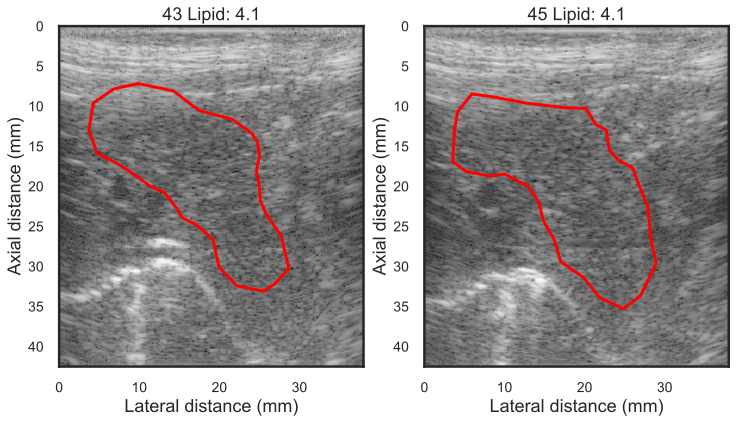

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


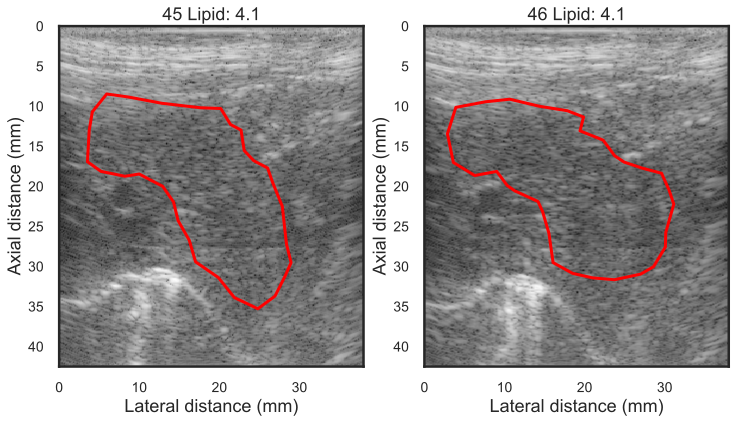

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


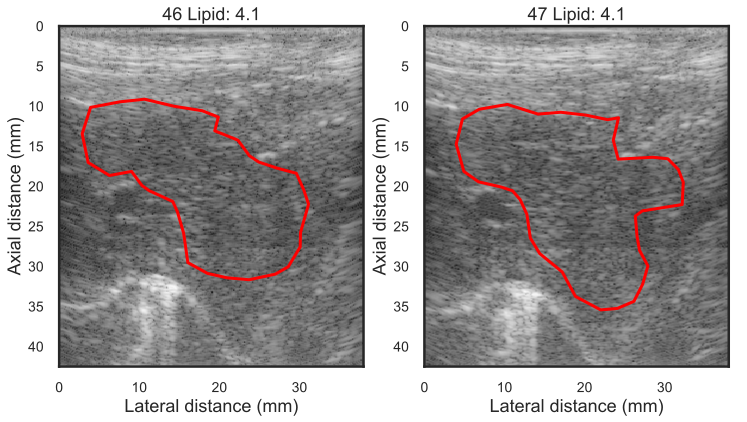

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


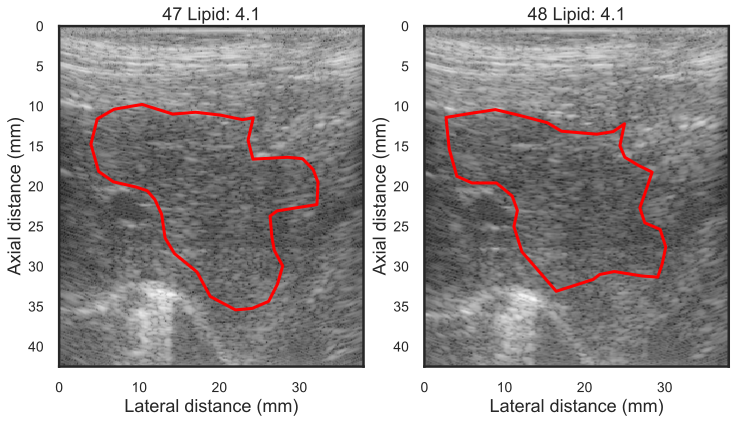

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


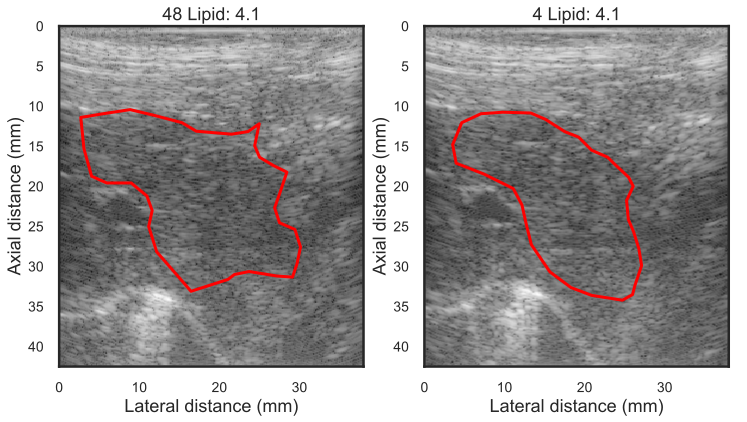

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


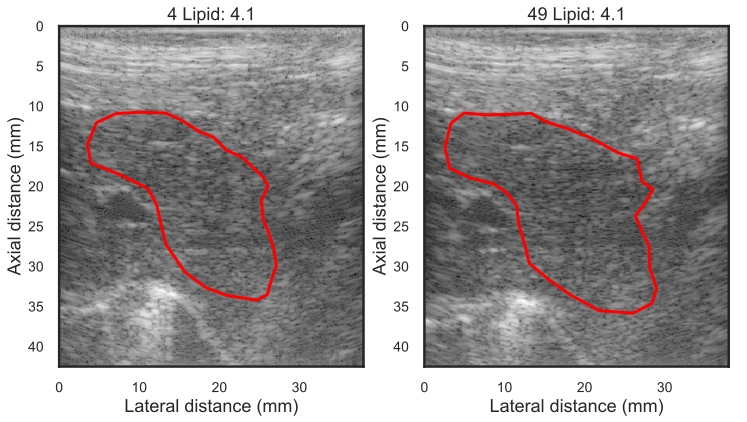

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


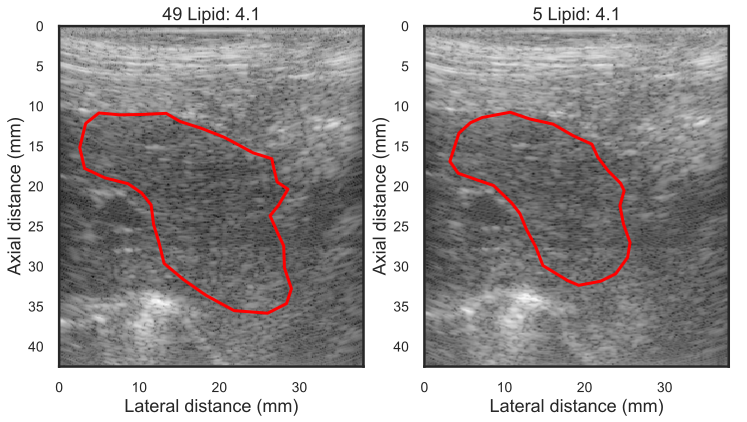

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


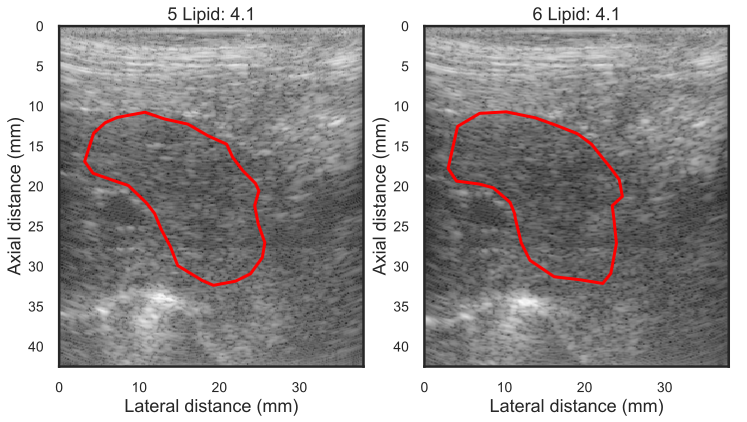

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


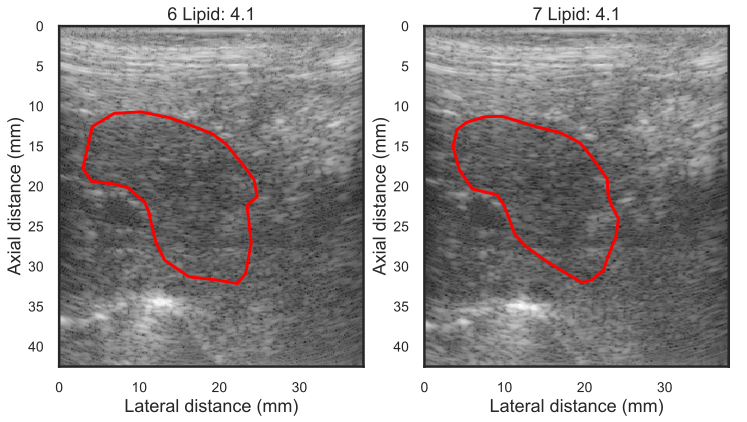

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


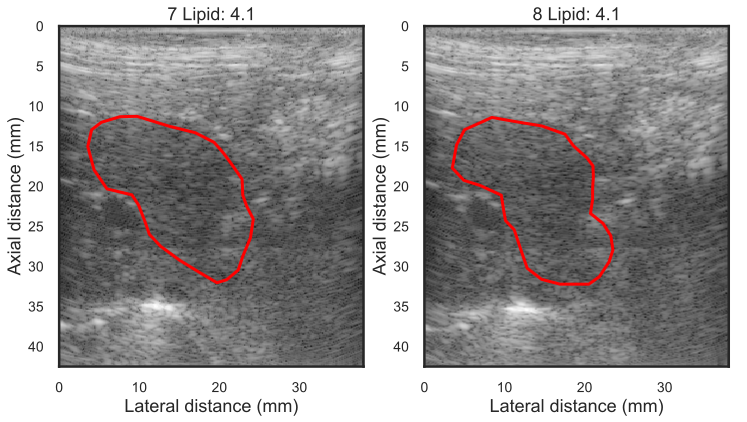

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


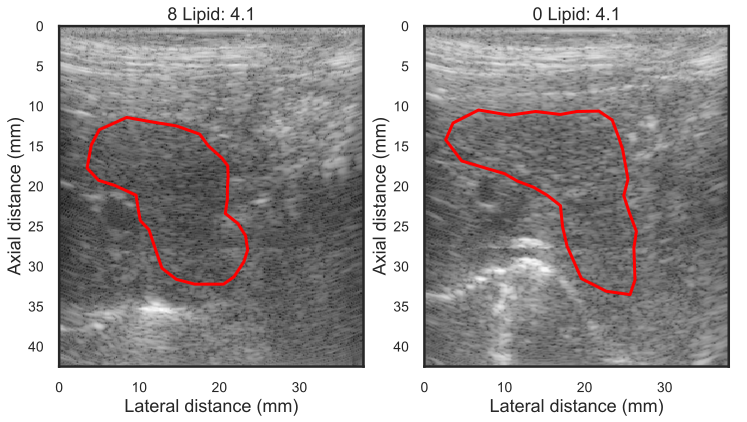

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


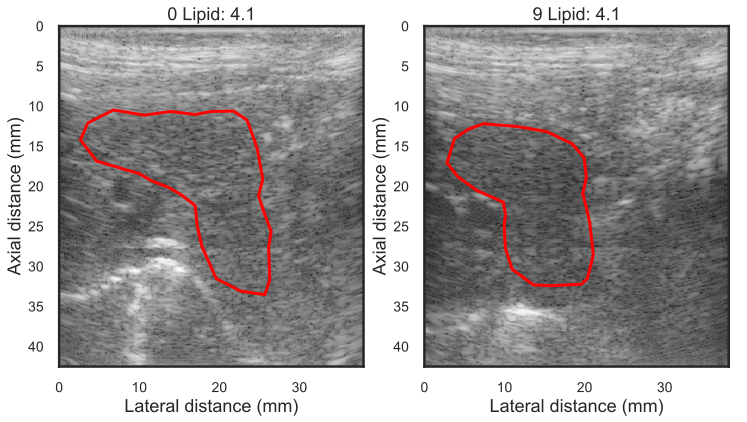

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


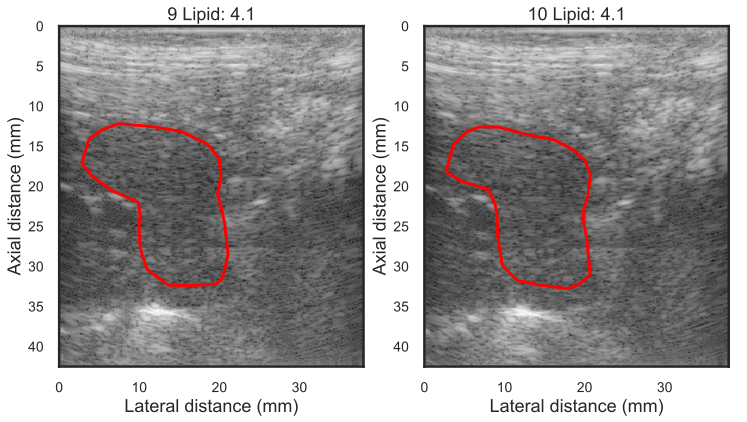

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


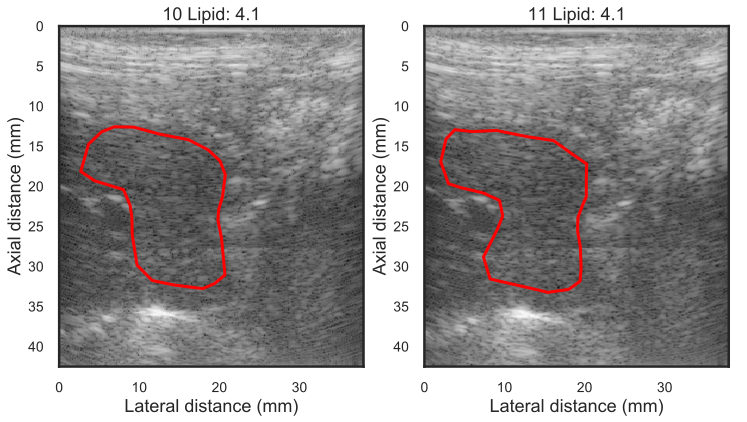

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


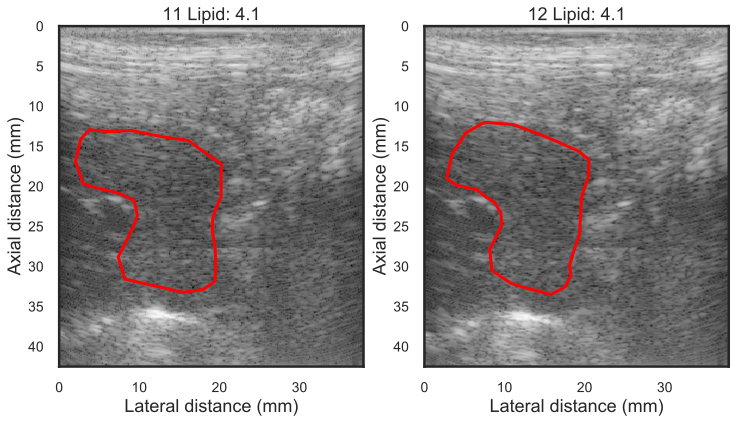

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


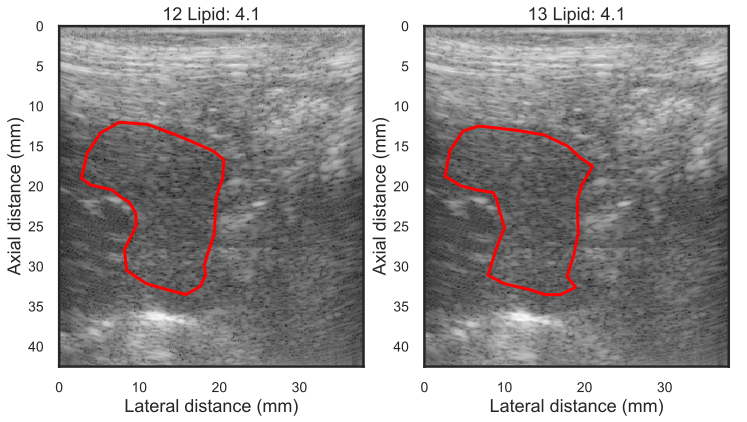

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


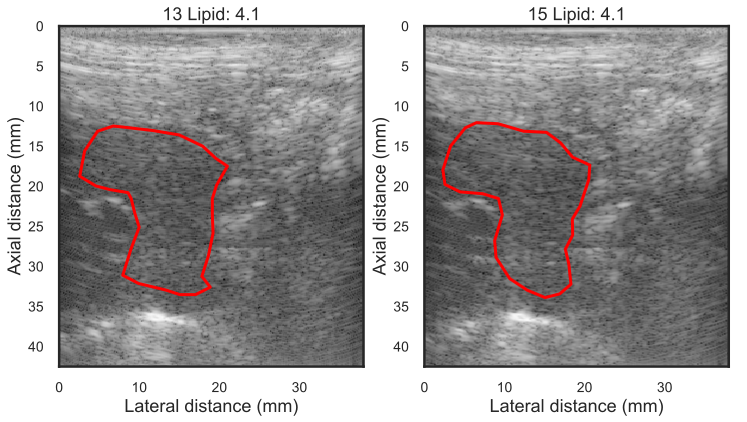

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


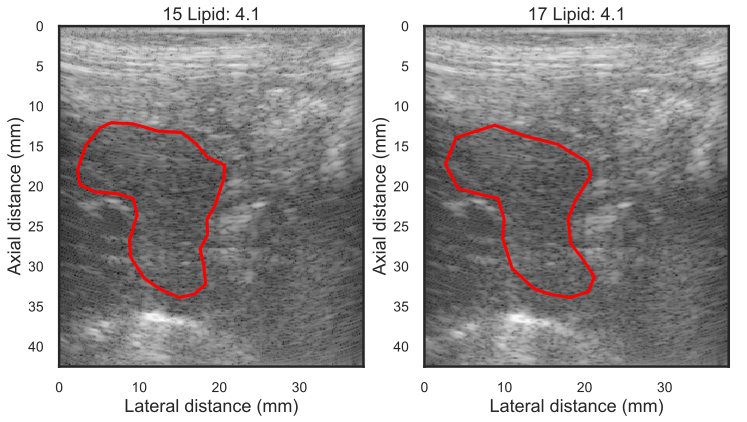

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


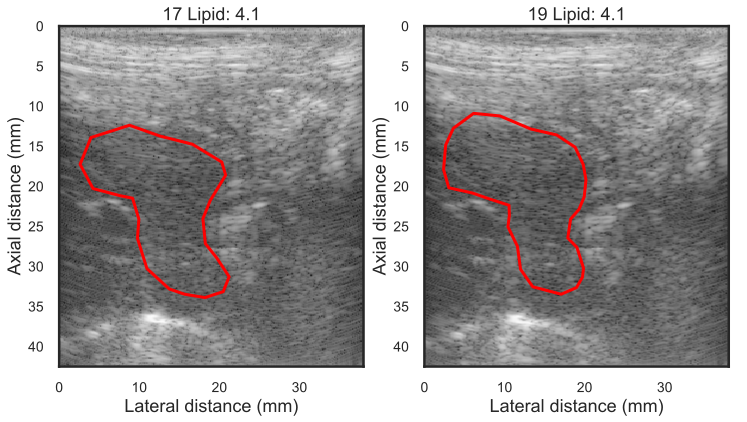

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


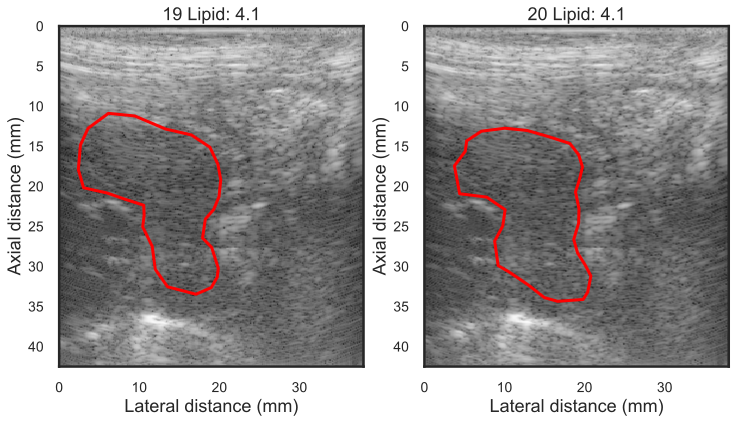

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L750/RF/newSegmentPoints/


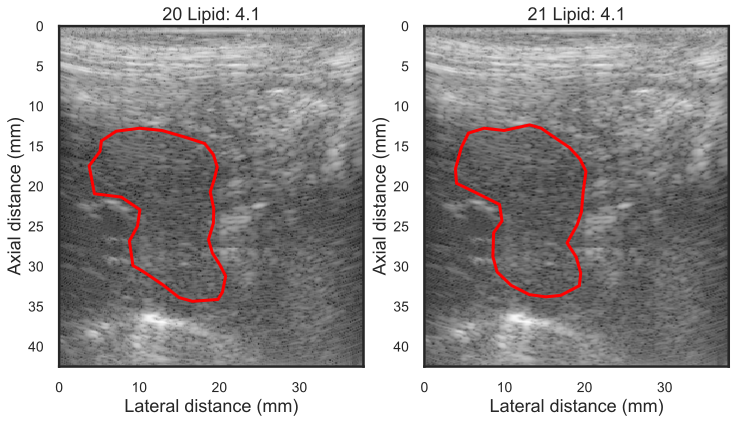

In [35]:
root_path = '/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L'

lipid = dataBase.loc[dataBase.Rabbit == int(number), 'Lipid']
lipid = lipid.tolist()[0]

frame_list  = list(ATTs_dict[number].keys())
count = 0
for idx in range(0, int(len(frame_list)/2)):

    fig = plt.figure(figsize = (12, 10))
    ax1 = fig.add_subplot(121)
       
    frameNumber = int(frame_list[count]) - 1
    path = root_path+number+'/RF/newSegmentPoints/'
    segmentPoints = extract_segment_points(path, frameNumber)
    
    hf = h5py.File(rf_path + number + '.h5', 'r')
    gp = hf.get('L94/Left')
    image = np.array(gp.get(str(frameNumber)))
    
    envIm = envDetection(image) # the envelope image
        
    ax1.imshow(np.flipud(envIm), vmax = 0, vmin = -80, extent = extent, \
                  aspect = 1,  cmap=plt.cm.gray)

    ax1.invert_yaxis()
    ax1.set_title(str(frameNumber) + ' Lipid: '+ str(lipid))
    ax1.set_xlabel('Lateral distance (mm)')
    ax1.set_ylabel('Axial distance (mm)')
    line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    
    ax1.add_line(line)
    hf.close()
    
    count = count + 1
    ax2 = fig.add_subplot(122)
       
    frameNumber = int(frame_list[count]) - 1
    path = root_path+number+'/RF/newSegmentPoints/'
    segmentPoints = extract_segment_points(path, frameNumber)
    
    hf = h5py.File(rf_path + number + '.h5', 'r')
    gp = hf.get('L94/Left')
    image = np.array(gp.get(str(frameNumber)))
    
    envIm = envDetection(image) # the envelope image
        
    ax2.imshow(np.flipud(envIm), vmax = 0, vmin = -80, extent = extent, \
                  aspect = 1,  cmap=plt.cm.gray)

    ax2.invert_yaxis()
    ax2.set_title(str(frameNumber) + ' Lipid: '+ str(lipid))
    ax2.set_xlabel('Lateral distance (mm)')
    ax2.set_ylabel('Axial distance (mm)')
    line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    
    ax2.add_line(line)
    hf.close()
    count = count + 1
    plt.show()

In [ ]:
root_path = '/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L'

lipid = dataBase.loc[dataBase.Rabbit == int(number), 'Lipid']
lipid = lipid.tolist()[0]
for key in ATTs_dict[number]:

    fig = plt.figure(figsize = (12, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 2], height_ratios=[1, 1]) 
    ax1 = plt.subplot(gs[0])

    frameNumber = int(key) - 1
    path = root_path+number+'/RF/newSegmentPoints/'
    segmentPoints = extract_segment_points(path, frameNumber)
    
    hf = h5py.File(rf_path + number + '.h5', 'r')
    gp = hf.get('L94/Left')
    image = np.array(gp.get(str(frameNumber)))
    
    gp1 = hf.get('L94/Ref')
    ref_image = np.array(gp1.get(str(frameNumber)))
    hf.close()
    
    envIm = envDetection(image) # the envelope image
        
    ax1.imshow(np.flipud(envIm), vmax = 0, vmin = -80, extent = extent, \
                  aspect = 1,  cmap=plt.cm.gray)

    ax1.invert_yaxis()
    ax1.set_title(str(key) + ' Lipid: '+ str(lipid))
    ax1.set_xlabel('Lateral distance (mm)')
    ax1.set_ylabel('Axial distance (mm)')
    line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    
    ax1.add_line(line)
    # plot mean BSCs
    with sns.axes_style('darkgrid'):
        ax2 = plt.subplot(gs[1])
    bscs = BSCs_dict[number]
    if (len(bscs) ==0):
        continue
    freq_key = next(iter(freq_bsc_dict[number]))
    freq = freq_bsc_dict[number][freq_key].flatten()
    mean_bsc = np.zeros(1024)
    
    for k, v in (bscs.items()):
        bsc_single_frame = np.mean(v, axis = 1)
        ax2.semilogy(freq, bsc_single_frame, 'g')
        mean_bsc = mean_bsc + bsc_single_frame
    ax2.set_title('Mean BSC (red) of 50 frames of L'+ number)
    mean_bsc = mean_bsc / len(bscs)
    ax2.semilogy(freq, mean_bsc, 'r')
    #ax2.set_xlabel('Frequency (MHz)')
    ax2.set_ylabel('BSC $(cm^{-1}Sr^{-1})$')
    ax2.set_ylim([10**-5,10**-1])
    
    #ref_image = rf_reference_dict[number][:,:,frameNumber]
    ref_envIm = envDetection(ref_image)
    ax4 = plt.subplot(gs[2])
    ax4.imshow(np.flipud(ref_envIm), vmax = 0, vmin = -80, extent = extent, \
                  aspect = 1,  cmap=plt.cm.gray)
    line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    


    ax4.invert_yaxis()
    ax4.add_line(line)
    ax4.set_title('Reference image' + str(number) + ' Lipid: '+ str(lipid))
    ax4.set_xlabel('Lateral distance (mm)')
    ax4.set_ylabel('Axial distance (mm)')
 
    
    with sns.axes_style('darkgrid'):
        ax3 = plt.subplot(gs[3])
    atts = ATTs_dict[number][key]
    for i in range(atts.shape[1]):
        ax3.plot(freq, atts[:,i], color = 'b')
        
    ax3.set_xlabel('Frequency (MHz)')
    ax3.set_ylabel('dB/cm')
    ax3.set_title('Mean attenuation')
    plt.show()
    #break

In [58]:
len(bscs)

0

In [48]:
os.path.dirname(path[:-1])

'/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L770/RF'

In [50]:
extract_segment_points(path, frameNumber)

array([[ 17.97024237,  13.76485637,   8.66324057,   6.18137343,
          3.63056553,   2.87221724,   2.69986535,   3.42374327,
          3.38927289,   3.32033214,   3.66503591,   4.28550269,
          6.35372531,  10.14546679,  12.24815978,  15.5228456 ,
         17.72894973,  19.79717235,  19.62482047,  19.07329443,
         19.48693896,  21.62410233,  20.86575404,  21.27939856,
         19.4179982 ,  18.86647217,  17.97024237],
       [  8.78173743,   8.12543582,   8.15997801,   8.81627962,
         11.30331732,  13.03042684,  16.86460996,  19.2134789 ,
         21.45872127,  24.9474825 ,  26.98547172,  27.50360458,
         28.09082181,  28.64349686,  28.85075   ,  28.60895467,
         26.95092953,  24.98202469,  23.22037298,  21.63143223,
         18.83351481,  16.10468178,  12.51229399,  11.44148609,
         10.16342504,   9.57620781,   8.78173743]])

# Attenuation analysis

In [73]:
len(ATTs_dict)

15

In [75]:
ATTs_dict.keys()

dict_keys(['729', '731', '739', '758', '756', '740', '750', '754', '757', '752', '755', '751', '749', '753', '730'])

In [77]:
ATTs_dict['730'].keys()

dict_keys(['17', '9', '22', '12', '38', '1', '29', '34', '23', '18', '45', '25', '3', '33', '31', '40', '4', '20', '11', '21', '5', '43', '30', '10', '32', '6', '36', '13', '42', '7', '39', '35', '19', '8', '2', '41'])

In [ ]:
for index, row in dietOnly.iterrows():
    number = str(int(row.Rabbit))
    print(number, end = ',')
    lipid = row.Lipid
    atts = ATTs_dict[number]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    mean_att = np.zeros(1024)
    for k, v in (atts.items()):
        ax.plot(freq, v, c = 'g')
        mean_att = mean_att + v.flatten()
    plt.plot(freq, mean_att/len(atts), c = 'r')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel('dB/cm')
    ax.set_title('Mean attenuation of L'+ number)
    plt.show()
   

In [51]:
dataBase

Rabbit  Injection level  Weeks on diet  Lipid  High_fat
1      729              0.0              0   3.27     False
2      749              0.0              0   3.29     False
3      750              0.0              0   4.10     False
4      752              0.0              1   6.60     False
5      730              0.0              2   7.22     False
6      739              0.0              1   7.50     False
7      751              0.0              1   8.20     False
8      754              0.0              2   9.81     False
9      753              0.0              2  10.92     False
10     740              0.0              3  13.17      True
11     731              0.0              6  13.76      True
12     755              0.0              3  14.08      True
13     757              0.0              6  14.54      True
14     756              0.0              3  15.23      True
15     758              0.0              6  20.66      True

In [48]:
os.chdir('/Users/trongnguyen/Dropbox/FattyLiver/')

In [53]:
file_pointer = pd.ExcelWriter('FifteenRabbits.xlsx', engine='xlsxwriter')

dataBase.to_excel(file_pointer)

In [55]:
file_pointer.save()